In [1]:
# importing packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV, LeaveOneOut, KFold

In [2]:
print(os.getcwd())

h:\CTSN\Project


In [3]:
slash = "/" if "Linux" in platform.platform() else "\\"

In [4]:
data_link = os.getcwd() + f'{slash}Dataset_TBI.xlsx'

## Data exploration

In [5]:
df_data = pd.read_excel(data_link, index_col=0)
print(df_data)

         Age Sex Marshall (t0) Entry Diagnosis (t0)  CRS-R (t1)  RLAS (t1)  \
Subject                                                                      
S1        76   M             V                  MCS        10.0          3   
S2        28   M           III                  MCS         8.0          3   
S3        20   F            II                  MCS         9.0          3   
S4        22   M            II             EMERSION        23.0          4   
S5        62   M            II             EMERSION        23.0          4   
...      ...  ..           ...                  ...         ...        ...   
S98       19   F            II             EMERSION        23.0          7   
S99       86   M             V             EMERSION        23.0          5   
S100      76   M            II             EMERSION        23.0          6   
S101      22   M             V             EMERSION        23.0          7   
S102      57   M            II             EMERSION        23.0 

In [6]:
df_data.isnull()

,Age,Sex,Marshall (t0),Entry Diagnosis (t0),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2)
Subject,,,,,,,,,,,,,,,,,
S1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False
S2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
S3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
S4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
S5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
S99,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
S100,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df_data.describe()

,Age,CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2)
count,102.000000,101.000000,102.000000,102.000000,102.000000,102.000000,102.000000,90.000000,90.000000,100.000000,90.000000,90.000000,102.000000
mean,47.686275,16.396040,3.931373,18.676471,-153.186275,0.980392,2.578431,20.944444,5.866667,12.260000,-25.000000,55.944444,4.098039
std,20.606151,7.855036,1.599875,4.353585,74.184641,3.919942,0.496249,4.835173,1.670632,8.591304,55.586758,38.335409,2.240535
min,18.000000,1.000000,1.000000,6.000000,-275.000000,0.000000,2.000000,3.000000,2.000000,0.000000,-175.000000,0.000000,1.000000
25%,29.000000,8.000000,3.000000,16.000000,-175.000000,0.000000,2.000000,23.000000,5.000000,5.000000,0.000000,16.250000,2.250000
50%,46.500000,23.000000,4.000000,18.000000,-175.000000,0.000000,3.000000,23.000000,6.000000,10.000000,0.000000,67.500000,3.000000
75%,65.000000,23.000000,5.000000,21.000000,-125.000000,0.000000,3.000000,23.000000,7.000000,17.250000,0.000000,90.000000,7.000000
max,91.000000,23.000000,8.000000,29.000000,125.000000,30.000000,3.000000,23.000000,8.000000,30.000000,0.000000,100.000000,8.000000


In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, S1 to S102
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          102 non-null    int64  
 1   Sex                          102 non-null    object 
 2   Marshall (t0)                99 non-null     object 
 3   Entry Diagnosis (t0)         102 non-null    object 
 4   CRS-R (t1)                   101 non-null    float64
 5   RLAS (t1)                    102 non-null    int64  
 6   DRS (t1)                     102 non-null    int64  
 7   ERBI A (t1)                  102 non-null    int64  
 8   ERBI B (t1)                  102 non-null    int64  
 9   GOS-E (t1)                   102 non-null    int64  
 10  Diagnosis at Discharge (t2)  102 non-null    object 
 11  CRS-R (t2)                   90 non-null     float64
 12  RLAS (t2)                    90 non-null     float64
 13  DRS (t2)               

In [8]:
df_data['GOS-E (t2)'].value_counts()

GOS-E (t2)
3    31
7    25
2    14
1    12
4     7
6     5
5     4
8     4
Name: count, dtype: int64

In [9]:
df_tbi4 = df_data

In [10]:
df_tbi4['GOS-E (t2)'] = df_tbi4['GOS-E (t2)'].apply(lambda x: 1 if 1 <= x <= 2 else x)
df_tbi4['GOS-E (t2)'] = df_tbi4['GOS-E (t2)'].apply(lambda x: 3 if 3 <= x <= 4 else x)
df_tbi4['GOS-E (t2)'] = df_tbi4['GOS-E (t2)'].apply(lambda x: 2 if 5 <= x <= 6 else x)
df_tbi4['GOS-E (t2)'] = df_tbi4['GOS-E (t2)'].apply(lambda x: 4 if 7 <= x <= 8 else x)

In [11]:
df_tbi4['GOS-E (t2)'].value_counts()

GOS-E (t2)
3    38
4    29
1    26
2     9
Name: count, dtype: int64

## Lable Encode

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoder1 = OneHotEncoder()
encoder2 = LabelEncoder()
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer

In [13]:
mapping = {
    'II': '2',
    'III': '3',
    'IV': '4',
    'V': '5',
    'VI': '6'}
df_tbi4['Marshall (t0)'] = df_tbi4['Marshall (t0)'].replace(mapping)

In [14]:
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df_tbi4['Sex']= label_encoder.fit_transform(df_tbi4['Sex']) 
df_tbi4['Entry Diagnosis (t0)']= label_encoder.fit_transform(df_tbi4['Entry Diagnosis (t0)'])
df_tbi4['Diagnosis at Discharge (t2)']= label_encoder.fit_transform(df_tbi4['Diagnosis at Discharge (t2)'])
df_tbi4x= df_tbi4
# df_tbi4x = df_tbi4.drop('Subject', axis=1)
df_tbi4x.head() 

,Age,Sex,Marshall (t0),Entry Diagnosis (t0),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2)
Subject,,,,,,,,,,,,,,,,,
S1,76,1,5,2,10.0,3,18,-175,0,3,0,NaN,NaN,30.0,NaN,NaN,1
S2,28,1,3,2,8.0,3,20,-125,0,2,1,23.0,7.0,8.0,0.0,60.0,3
S3,20,0,2,2,9.0,3,18,-175,0,2,1,23.0,7.0,6.0,0.0,70.0,3
S4,22,1,2,0,23.0,4,15,-175,0,3,1,23.0,7.0,3.0,0.0,100.0,4
S5,62,1,2,0,23.0,4,15,-100,5,3,1,23.0,6.0,10.0,-50.0,90.0,3


In [15]:
scaler = StandardScaler()
df_new_tbi_target = df_tbi4x['GOS-E (t2)']
df_new_array = scaler.fit_transform(df_tbi4x)
df_tbi_f = pd.DataFrame(df_new_array)
df_tbi_f.columns = df_tbi4x.columns.to_list()
df_tbi_f

,Age,Sex,Marshall (t0),Entry Diagnosis (t0),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2)
0,1.380828,0.630286,1.087012,0.673219,-0.818321,-0.585028,-0.156150,-0.295498,-0.251339,0.853706,-1.149958,NaN,NaN,2.075281,NaN,NaN,-1.482538
1,-0.960077,0.630286,-0.377127,0.673219,-1.074205,-0.585028,0.305510,0.381824,-0.251339,-1.171364,-0.261354,0.427507,0.682187,-0.498348,0.452267,0.106384,0.275821
2,-1.350228,-1.586582,-1.109196,0.673219,-0.946263,-0.585028,-0.156150,-0.295498,-0.251339,-1.171364,-0.261354,0.427507,0.682187,-0.732315,0.452267,0.368701,0.275821
3,-1.252690,0.630286,-1.109196,-0.869890,0.844923,0.043107,-0.848640,-0.295498,-0.251339,0.853706,-0.261354,0.427507,0.682187,-1.083264,0.452267,1.155651,1.155001
4,0.698064,0.630286,-1.109196,-0.869890,0.844923,0.043107,-0.848640,0.720485,1.030489,0.853706,-0.261354,0.427507,0.080257,-0.264382,-0.452267,0.893335,0.275821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-1.398997,-1.586582,-1.109196,-0.869890,0.844923,1.927514,-1.310300,1.397807,-0.251339,0.853706,-0.261354,0.427507,1.284116,-1.434213,0.452267,1.155651,1.155001
98,1.868516,0.630286,1.087012,-0.869890,0.844923,0.671243,-0.156150,0.720485,-0.251339,0.853706,-0.261354,0.427507,-0.521672,0.671483,0.452267,-1.467517,0.275821
99,1.380828,0.630286,-1.109196,-0.869890,0.844923,1.299378,-0.156150,2.075130,-0.251339,0.853706,-0.261354,0.427507,0.682187,0.203551,0.452267,-0.680566,0.275821
100,-1.252690,0.630286,1.087012,-0.869890,0.844923,1.927514,-2.464451,2.075130,2.312317,0.853706,-0.261354,0.427507,0.682187,-0.615331,0.452267,-1.336358,0.275821


In [18]:
# Tạo đối tượng KNNImputer với tham số n_neighbors=25
knn_imputer = KNNImputer(n_neighbors=25)
df = knn_imputer.fit_transform(df_tbi_f)
df = pd.DataFrame(knn_imputer.fit_transform(df), columns=df_tbi_f.columns)
df

,Age,Sex,Marshall (t0),Entry Diagnosis (t0),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2),GOS-E (t2)
0,1.380828,0.630286,1.087012,0.673219,-0.818321,-0.585028,-0.156150,-0.295498,-0.251339,0.853706,-1.149958,-0.005084,-0.449441,2.075281,-0.144725,-0.670074,-1.482538
1,-0.960077,0.630286,-0.377127,0.673219,-1.074205,-0.585028,0.305510,0.381824,-0.251339,-1.171364,-0.261354,0.427507,0.682187,-0.498348,0.452267,0.106384,0.275821
2,-1.350228,-1.586582,-1.109196,0.673219,-0.946263,-0.585028,-0.156150,-0.295498,-0.251339,-1.171364,-0.261354,0.427507,0.682187,-0.732315,0.452267,0.368701,0.275821
3,-1.252690,0.630286,-1.109196,-0.869890,0.844923,0.043107,-0.848640,-0.295498,-0.251339,0.853706,-0.261354,0.427507,0.682187,-1.083264,0.452267,1.155651,1.155001
4,0.698064,0.630286,-1.109196,-0.869890,0.844923,0.043107,-0.848640,0.720485,1.030489,0.853706,-0.261354,0.427507,0.080257,-0.264382,-0.452267,0.893335,0.275821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-1.398997,-1.586582,-1.109196,-0.869890,0.844923,1.927514,-1.310300,1.397807,-0.251339,0.853706,-0.261354,0.427507,1.284116,-1.434213,0.452267,1.155651,1.155001
98,1.868516,0.630286,1.087012,-0.869890,0.844923,0.671243,-0.156150,0.720485,-0.251339,0.853706,-0.261354,0.427507,-0.521672,0.671483,0.452267,-1.467517,0.275821
99,1.380828,0.630286,-1.109196,-0.869890,0.844923,1.299378,-0.156150,2.075130,-0.251339,0.853706,-0.261354,0.427507,0.682187,0.203551,0.452267,-0.680566,0.275821
100,-1.252690,0.630286,1.087012,-0.869890,0.844923,1.927514,-2.464451,2.075130,2.312317,0.853706,-0.261354,0.427507,0.682187,-0.615331,0.452267,-1.336358,0.275821


In [20]:
df_new = df.drop('GOS-E (t2)', axis = 1)
df_new_tbi_target = df_tbi4x['GOS-E (t2)']
df_new


,Age,Sex,Marshall (t0),Entry Diagnosis (t0),CRS-R (t1),RLAS (t1),DRS (t1),ERBI A (t1),ERBI B (t1),GOS-E (t1),Diagnosis at Discharge (t2),CRS-R (t2),RLAS (t2),DRS (t2),ERBI A (t2),ERBI B (t2)
0,1.380828,0.630286,1.087012,0.673219,-0.818321,-0.585028,-0.156150,-0.295498,-0.251339,0.853706,-1.149958,-0.005084,-0.449441,2.075281,-0.144725,-0.670074
1,-0.960077,0.630286,-0.377127,0.673219,-1.074205,-0.585028,0.305510,0.381824,-0.251339,-1.171364,-0.261354,0.427507,0.682187,-0.498348,0.452267,0.106384
2,-1.350228,-1.586582,-1.109196,0.673219,-0.946263,-0.585028,-0.156150,-0.295498,-0.251339,-1.171364,-0.261354,0.427507,0.682187,-0.732315,0.452267,0.368701
3,-1.252690,0.630286,-1.109196,-0.869890,0.844923,0.043107,-0.848640,-0.295498,-0.251339,0.853706,-0.261354,0.427507,0.682187,-1.083264,0.452267,1.155651
4,0.698064,0.630286,-1.109196,-0.869890,0.844923,0.043107,-0.848640,0.720485,1.030489,0.853706,-0.261354,0.427507,0.080257,-0.264382,-0.452267,0.893335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,-1.398997,-1.586582,-1.109196,-0.869890,0.844923,1.927514,-1.310300,1.397807,-0.251339,0.853706,-0.261354,0.427507,1.284116,-1.434213,0.452267,1.155651
98,1.868516,0.630286,1.087012,-0.869890,0.844923,0.671243,-0.156150,0.720485,-0.251339,0.853706,-0.261354,0.427507,-0.521672,0.671483,0.452267,-1.467517
99,1.380828,0.630286,-1.109196,-0.869890,0.844923,1.299378,-0.156150,2.075130,-0.251339,0.853706,-0.261354,0.427507,0.682187,0.203551,0.452267,-0.680566
100,-1.252690,0.630286,1.087012,-0.869890,0.844923,1.927514,-2.464451,2.075130,2.312317,0.853706,-0.261354,0.427507,0.682187,-0.615331,0.452267,-1.336358


### MRMR

In [31]:
from scipy.stats import kruskal
import mrmr
# from mrmr import mrmr_classif
import pymrmr
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score

In [37]:
def mrmr(X, y):
    num_features = X.shape[1]
    selected_features = []
    mrmr_scores = []

    for _ in range(num_features):
        scores = []

        for feature in range(num_features):
            if feature not in selected_features:
                relevance = mutual_info_classif(X.iloc[:, feature].astype(float).values.reshape(-1, 1), y.astype(float))
                redundancy = sum([mutual_info_score(X.iloc[:, feature].astype(float), X.iloc[:, selected_feature].astype(float)) for selected_feature in selected_features])
                mrmr_score = relevance - (1 / len(selected_features) if len(selected_features) > 0 else 0) * redundancy
                scores.append((feature, mrmr_score))
                mrmr_scores.append(mrmr_score)

        # scores = sorted(scores, key = lambda x: x[1], reverse = True)
        # selected_feature = scores[0][0]
        # selected_features.append(selected_feature)

    # return selected_features, mrmr_scores, scores
    return scores
    
# Example usage with your data
scores = mrmr(X= df_new, y=df_new_tbi_target)
# selected_features, mrmr_scores, scores = mrmr(X= df_new_tbi, y=df_new_tbi_target)

print(scores)
# print("Selected Features:", selected_features)
# for feature, score in zip(selected_features, mrmr_scores):
#     print(f"Feature {feature}: MRMR Score = {score}")

[(0, array([0.16499625])), (1, array([0.0062684])), (2, array([0.12949604])), (3, array([0.26655645])), (4, array([0.33864448])), (5, array([0.32304946])), (6, array([0.3819006])), (7, array([0.20230733])), (8, array([0.01548368])), (9, array([0.19157695])), (10, array([0.48922765])), (11, array([0.4417835])), (12, array([0.51817946])), (13, array([0.90486856])), (14, array([0.44804099])), (15, array([0.55149332]))]


In [ ]:
# l = {'Age':0.1358952, 'Sex':0.01771904, 'Marshall (t0)': 0.12624975, 'Entry Diagnosis (t0)':0.2436854, 'CRS-R (t1)':0.4090627,
#        'RLAS (t1)':0.36307434, 'DRS (t1)':0.30710936, 'ERBI A (t1)':0.33973817, 'ERBI B (t1)':7.41600099e-05}

# # l_sorted = sorted(l.items(), key=lambda x:x[1], reverse=True)
# # print(l_sorted)
# l_sorted_dict = {'CRS-R (t1)': 0.4090627, 'RLAS (t1)': 0.36307434, 'ERBI A (t1)': 0.33973817, 
#  'DRS (t1)': 0.30710936, 'Entry Diagnosis (t0)': 0.2436854, 'Age': 0.1358952, 
#  'Marshall (t0)': 0.12624975, 'Sex': 0.01771904, 'ERBI B (t1)': 7.41600099e-05}
# names = list(l_sorted_dict.keys())
# values = list(l_sorted_dict.values())
# plt.figure(figsize=(14,6))
# plt.bar(range(len(l_sorted_dict)), values, tick_label=names)
# plt.show()

#### CRS-R (t1) RLAS (t1) ERBI A(t1) DRS (t1) Entry Diagnosis (t0)

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn import naive_bayes, neighbors, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import GaussianNB

### Splitting set

In [21]:
X_selected = df_new[['CRS-R (t1)', 'RLAS (t1)', 'ERBI A (t1)', 
                         'DRS (t1)', 'Entry Diagnosis (t0)']]
X_selected
y = df_new_tbi_target

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

## Solving unbalanced data by oversampling

In [24]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

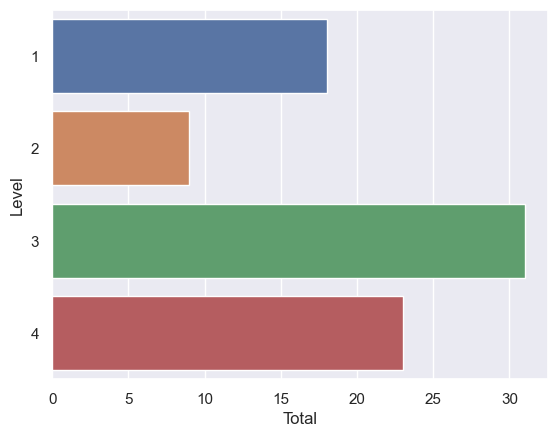

In [26]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=X_train)
sns.color_palette("husl", 8)
plt.ylabel('Level')
plt.xlabel('Total')
plt.show()

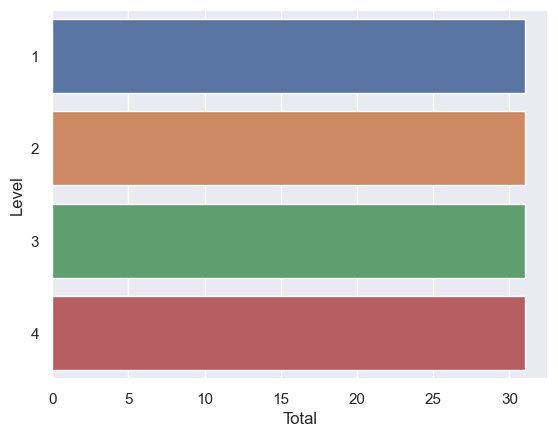

In [25]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_resampled, data=X_resampled)
sns.color_palette("husl", 8)
plt.ylabel('Level')
plt.xlabel('Total')
plt.show()

### Model training

### Gridsearch

In [ ]:
# Define the models with their hyperparameter grids
svm_model = make_pipeline(SVC())
svm_param_grid = {'svc__kernel': ['linear', 'rbf']}

logreg_model = make_pipeline(LogisticRegression(max_iter=1000))
logreg_param_grid = {'logisticregression__C': [0.1, 1, 10]}


dt_model = make_pipeline(DecisionTreeClassifier())
dt_param_grid = {'decisiontreeclassifier__max_depth': [None, 10, 20], 'decisiontreeclassifier__min_samples_split': [2, 5, 10]}

knn_model = make_pipeline(KNeighborsClassifier())
knn_param_grid = {'kneighborsclassifier__n_neighbors': [3, 5, 7]}

gnb_model = make_pipeline( GaussianNB())

random_search = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Create a list of models with their corresponding parameter grids
models = [
    (logreg_model, logreg_param_grid),
    (svm_model, svm_param_grid),
    (dt_model, dt_param_grid),
    (knn_model, knn_param_grid),
    (gnb_model, {}), 
    (random_search, param_grid_rf) # GaussianNB does not have specific hyperparameters to tune
]


#### 10-fold

##### before SMOTE

In [ ]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Define 10-fold cross-validation
k_fold = KFold(n_splits=10)

# Iterate over models
for model, param_grid in models:
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=k_fold, scoring='accuracy')
    grid_search.fit(X_selected, y)
    
    # Get best estimator
    best_model = grid_search.best_estimator_
    
    y_true = []
    y_pred = []
    for train_index, test_index in k_fold.split(X_selected):
        X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
        y_train, y_test = y.iloc[train_index],y.iloc[test_index]
        
        # Train model on training data
        best_model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(best_model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, (model, _) in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


##### after SMOTE

In [ ]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Define 10-fold cross-validation
k_fold = KFold(n_splits=10)

# Iterate over models
for model, param_grid in models:
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=k_fold, scoring='accuracy')
    grid_search.fit(X_resampled, y_resampled)
    
    # Get best estimator
    best_model = grid_search.best_estimator_
    
    y_true = []
    y_pred = []
    for train_index, test_index in k_fold.split(X_resampled):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index],y_resampled.iloc[test_index]
        
        # Train model on training data
        best_model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(best_model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, (model, _) in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


#### LOOCV

##### before SMOTE

In [ ]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
loo = LeaveOneOut()

# Iterate over models
for model, param_grid in models:
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=k_fold, scoring='accuracy')
    grid_search.fit(X_selected, y)
    
    # Get best estimator
    best_model = grid_search.best_estimator_
    
    y_true = []
    y_pred = []
    for train_index, test_index in loo.split(X_selected):
        X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Train model on training data
        best_model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(best_model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, (model, _) in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


##### after SMOTE

In [ ]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
loo = LeaveOneOut()

# Iterate over models
for model, param_grid in models:
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=k_fold, scoring='accuracy')
    grid_search.fit(X_resampled, y_resampled)
    
    # Get best estimator
    best_model = grid_search.best_estimator_
    
    y_true = []
    y_pred = []
    for train_index, test_index in loo.split(X_resampled):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
        
        # Train model on training data
        best_model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(best_model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, (model, _) in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")
